In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [180]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# **피드백 모음집**

In [4]:
# 피드백1 [완료]
# 초반에는  info로
# 굳이 만들지 않아도 되는 변수는 삭제할 것. 

# 피드백2 [완료]
# 그래프를 병렬적으로 보기 쉽게 표현해주세요. 남자, 여자 몇 위 ... -> 알기 쉽게끔 정리해주시는 것이 좋아요.
# EDA는 큰 덩어리에서 시작해서 점점 세분화 하며 진행 하는 방향으로.

# 피드백3 [완료]
# 영화 리뷰를 한 사람이 몇 명이니(의미가 없으니) 날리겠다.
# 위 처럼 출력하는 것이 아닌 시각화(바챠트)
# 테이블로 보여주면 전체가 보여지는 것이 아님. 상대방은 알 수가 없어요.

# 피드백4 [완료]
# 이런 시각화는 처음에 해주는 것이 좋아요. -> EDA도 스토리가 있어야 해요. 기승전결
# 데이터 EDA는 초반에, 이후에 인사이트 
# Depth있게 진행. 그래야 협업하는 사람도 이해할 수 있어요.

# 피드백5 [완료]
# 영화 재개봉 가능성.
# 삭제를 하게 된다면 근거 적기.

# 피드백6 [완료]
# 이 그래프도 상단에 적고,
# 비슷한 류의 그래프가 있으니 둘 중에 하나만 선택해서 기록해주세요.

# 피드백7 [완료]
# 이런 스택챠트 보다 바 챠트를 양쪽으로.
# 여자의 경우 뮤지컬 - 미스테리 비율 달라요... 따라서 성별별로 따로 그리는 것이 좋다.

# 피드백8
# 위의 그래프도 스택 챠트가 아니라, 따로 표현하는 것이 좋다.
# 각 그룹의 비율이 다를 수 있어요.

# 피드백9 [완료]
# EDA는 데이터에 입각 - 2000년도의 데이터 분포를 보여줘야한다.
# 지금 제가 낸 의견은 주관적입니다. -> 근거가 있어야 합니다.

# 피드백10 [완료]
# 0.3의 경우에는 크게 의미가 없기 때문에 other 항목으로.
# 의미있는 비율들만 중점적으로 보는 것이 좋아요.


# 피드백 이외에도 내가 더 할 수 있는 것은 무엇인가요? 120% 발휘해보세요.

# **EDA를 통해 알아보고자 하는 것**

In [4]:
### 의문도 확인해 보세요 ###
# 의문1. ratings 데이터 프레임의 경우 30.5 MB를 차지한다. 데이터 사이즈를 줄일 필요가 있을까?
# 의문2. 각각의 데이터 프레임에는 결측치가 존재하지 않는다. 그러나, 데이터 병합시 결측값이 발생할 수 있을까?
# 의문3. timestamp를 시계열 데이터로 사용할 수 있을까? (ex. 유저의 성향 변화)
# 의문4. 동일한 유저가 동일한 영화를 두 번 이상 관람하고 각각 다른 평점을 부여할 수 있을까?
# 의문5. 영화를 관람했지만, 평점을 남기지 않았을 수도 있을까? ex. 귀차니즘 ..
# 의문6. 초코맛 아이스크림 + 딸기 토핑 vs 딸기맛 아이스크림 + 초코 토핑
#   미묘하게 다른 취향을 어떻게 구분할 수 있을까요?
#   어차피 추천 시스템은 유사도 문제로 끝나기 때문에 큰 영향이 없을까요?
#   ex. [action - animation] 과 [animation - action] 의 차이.
#   1. 먼저 "|" split을 진행 -> 새로운 테이블 만들기?
#   2. columns[0]과 columns[1]을 서로 비교


"""
분석가인 내가 알고자 하는 것
1. 영화의 장르는 몇 가지가 있을까? [완료]
2-1. 영화의 개봉년도를 따로 구분하는 것은 어떨까? (새로운 컬럼 생성) [완료]
2-2. 영화 개봉 년도의 빈도를 확인해볼까? [완료]
3. 직업군은 숫자로 표현이 되어있다. 각각의 숫자가 의미하는 것은 무엇일까? -> README.txt 를 통해 알 수 있었다. [완료]
4. 성별별, 직업군별 영화 선호도가 있을까?
5. 모든 테이블을 join해서 보여주는 것이 편할까? [완료]
6. 내가 데이터 분석을 통해서 얻고자 하는 인사이트는 무엇인가?
7. 이것을 왜 하게 되었는가? why?
8. 어떤 스토리라인(기승전결)을 만들 수 있을까?
9. 시대 흐름별로 인기 장르가 다를까?
10. MF을 1, 0으로 변경? [완료]


[README.txt 내용 발췌]
- 일부 MovieID는 실수로 중복되어 영화와 일치하지 않습니다. [확인 완료]
- 영화는 대부분 손으로 입력하므로 오류 및 불일치가 존재할 수 있습니다. [확인 완료]


# 직업군별로 선호하는 영화 장르가 다를까? 사람의 성향이 반영된 것이 직업이고.
# 전체 영화 장르에 따라서... 성별별, 직업군별 영화 장르 선호도가 따라가는 것 같기도 하다..
"""

# **데이터 정의서**

**`MovieLens 1M Dataset`** <br/>
2000년에 MovieLens에 가입한 6,040 명의 MovieLens 사용자가 <br/>
약 3,900편의 영화에 대해 부여한 1,000,209개의 평점이 기록되어 있다.

<br/>

**`README.txt`** <br/>

    - Gender is denoted by a "M" for male and "F" for female
    
    - Age is chosen from the following ranges:
	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

    - Occupation is chosen from the following choices:
	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

<br/>

## **1. users (유저 정보)**
    - user_id: 유저에게 부여된 고유 id
	- sex: 유저의 성별 (M: 남성, F: 여성)
    - age: 유저의 나이
    - occupation_id: 유저의 직업군
    - zip_code:

<br/>

## **2. movies (영화 정보)**
    - movie_id: 영화에 부여된 고유 id
    - movie_title: 영화의 제목 (개봉년도가 포함되어 있다)
    - genre: 영화 장르 (한 개 이상의 장르가 포함되어 있다)

<br/>

## **3. ratings (평점 정보)**
    - userId: 유저의 식별정보. 개별 유저의 id를 의미함.
    - movieId: 영화(아이템)의 식별정보. 개별 영화의 id를 의미함.
    - rating: 유저가 해당 영화를 보고 내린 평점
    - timestamp: 유저가 해당 영화를 보고 평점을 내린 시간 정보





# **users(유저 정보)**

In [5]:
u_cols =  ['user_id', 'sex', 'age', 'occupation_id', 'zip_code']
users_file = 'https://raw.githubusercontent.com/yunong-E/cp2-Recommendation-System/main/1M_Dataset/users.dat'
users = pd.read_csv(users_file, sep='::', names=u_cols, encoding='ISO-8859-1')

n_users = users.shape[0]
print('Number of users:', n_users)

Number of users: 6040


In [6]:
users.head(3)

,user_id,sex,age,occupation_id,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        6040 non-null   int64 
 1   sex            6040 non-null   object
 2   age            6040 non-null   int64 
 3   occupation_id  6040 non-null   int64 
 4   zip_code       6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [8]:
# 결측치는 없습니다.
users.isna().sum()

user_id          0
sex              0
age              0
occupation_id    0
zip_code         0
dtype: int64

In [9]:
# 중복값도 존재하지 않습니다.
users.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4824a586a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4824a58be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4824a58400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f48249ef160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f48249ef400>],
 'means': []}

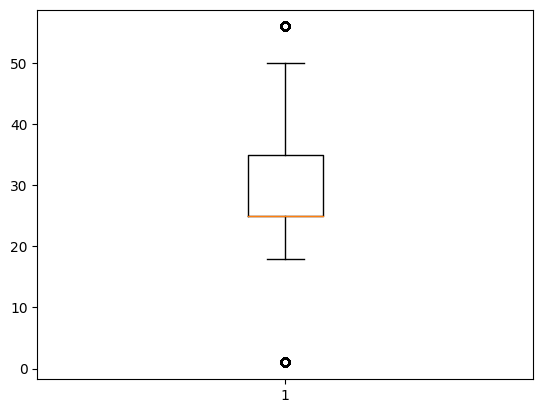

In [10]:
# box plot을 통해 이상치를 확인합니다.
plt.boxplot(users['age'])

In [11]:
# age 항목에서 min: 1, max: 56의 이상치가 발견되었습니다.
# README.txt에 따르면 이는 이상치가 아니라 "Under 18(18세 이하)"와 "56+(56세 이상)"을 의미합니다.
# 이들이 전체 파이에서 차지하는 비율은 약 10%이므로 삭제를 보류합니다.
users.describe()

,user_id,age,occupation_id
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [12]:
chk_len_1 = len(users[users['age']==1])
chk_len_56 = len(users[users['age']==56])
total_len = len(users)

chk_pie_1 = (chk_len_1/total_len) * 100
chk_pie_56 = (chk_len_56/total_len) * 100
print("18세 이하가 차지하는 비율 :", round(chk_pie_1, 2), "%")
print("56세 이상이 차지하는 비율 :", round(chk_pie_56, 2), "%")

18세 이하가 차지하는 비율 : 3.68 %
56세 이상이 차지하는 비율 : 6.29 %


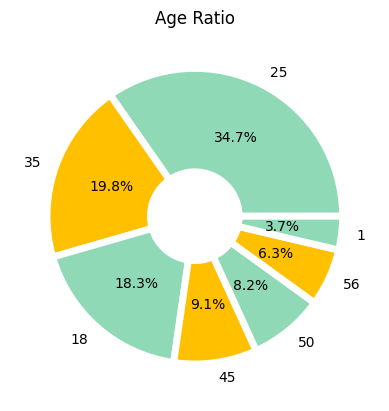

In [13]:
"""
- Age is chosen from the following ranges:
*  1:  "Under 18"
* 18:  "18-24"
* 25:  "25-34"
* 35:  "35-44"
* 45:  "45-49"
* 50:  "50-55"
* 56:  "56+"
"""
# 연령대 비율 확인
age_group = users.age.value_counts(normalize=True)

colors = ['#8fd9b6', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.title('Age Ratio')
plt.pie(age_group, labels=age_group.index, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

# **movies(영화 정보)**

In [14]:
i_cols = ['movie_id', 'movie_title', 'genre']

movies_file = 'https://raw.githubusercontent.com/yunong-E/cp2-Recommendation-System/main/1M_Dataset/movies.dat'
movies = pd.read_csv(movies_file, sep='::', names=i_cols, encoding='ISO-8859-1') # parse_dates=["release_date"]

n_movies = movies.shape[0]
print("Number of movies:",n_movies)

Number of movies: 3883


In [15]:
movies.head(3)

,movie_id,movie_title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_id     3883 non-null   int64 
 1   movie_title  3883 non-null   object
 2   genre        3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [17]:
# 결측치 없습니다.
movies.isna().sum()

movie_id       0
movie_title    0
genre          0
dtype: int64

In [18]:
# 중복값도 존재하지 않습니다.
movies.duplicated().sum()

0

In [19]:
# 영화의 개봉년도 컬럼을 새로 생성하여, 영화 개봉일의 분포도를 확인하고자 합니다.

# movies['release'] = movies['movie_title']
# release = movies['movie_title'].str.split("(").get(1)

# 년도 추출과 동시에 object형에서 int형으로 변환합니다.
release = movies['movie_title'].map(lambda x: x[-5:-1]).astype(int)
movies['release'] = release
movies.head(3)

,movie_id,movie_title,genre,release
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995


In [20]:
# 영화의 장르에 대해 depth있게 알아봅니다.
bar_list = []
cnt = 0

for row in movies['genre']:
  cnt = 0
  if "|" in row:  
    bar_list.append(row.count('|'))
  else:
    bar_list.append(0)

In [21]:
max(bar_list)

5

In [22]:
bar_list.index(5)

1187

In [23]:
# 가장 많은 장르를 포함한 영화는 무려 5개의 장르를 포함하고 있습니다.
movies['genre'][1187]

"Action|Animation|Children's|Sci-Fi|Thriller|War"

In [104]:
# 그리고 그 영화(가장 많은 장르를 포함한 영화)에 대한 정보는 다음과 같습니다.
movies.iloc[1187]

movie_id                                                     1205
movie_title                   Transformers: The Movie, The (1986)
genre             Action|Animation|Children's|Sci-Fi|Thriller|War
release                                                      1986
main_genre                                                 Action
release_decade                                               1980
Name: 1187, dtype: object

In [ ]:
# 의문6. 초코맛 아이스크림 + 딸기 토핑 vs 딸기맛 아이스크림 + 초코 토핑
# 미묘하게 다른 취향을 어떻게 구분할 수 있을까요?
# 어차피 추천 시스템은 유사도 문제로 끝나기 때문에 큰 영향이 없을까요?
# ex. action - animation 과 animation - action 의 차이.

# 1. 먼저 "|" split을 진행 -> 새로운 테이블 만들기?
# 2. columns[0]과 columns[1]을 서로 비교

In [24]:
# 중복되는 영화명과 영화 아이디는 없습니다.
# 100k 데이터에서 발견 되었던 
# 동일한 title + 상이한 movie_id 문제가 발견되지 않았습니다.
chk_title = pd.DataFrame(movies['movie_title'])
chk_id = pd.DataFrame(movies['movie_id'])

print("중복되는 영화명 갯수:", chk_title.duplicated().sum())
print("중복되는 영화 아이디 갯수:", chk_id.duplicated().sum())

중복되는 영화명 갯수: 0
중복되는 영화 아이디 갯수: 0


In [25]:
# 100k 데이터에서 문제가 되었던 movie_id(246)는 1M 데이터에서 수정이 된 듯 합니다.
# 100k 데이터에는 중복되는 movie_title이 존재했으며, 서로 다른 movie_id가 할당되어 있었습니다.
movies[movies['movie_id']==246]

,movie_id,movie_title,genre,release
243,246,Hoop Dreams (1994),Documentary,1994


In [26]:
chk_genre = movies['genre']
chk_genre = pd.DataFrame(chk_genre)
chk_genre

,genre
0,Animation|Children's|Comedy
1,Adventure|Children's|Fantasy
2,Comedy|Romance
3,Comedy|Drama
4,Comedy
...,...
3878,Comedy
3879,Drama
3880,Drama
3881,Drama


In [28]:
# 기록되어 있는 최초, 최후의 영화 개봉일 1910, 2020
# movies.release.min(), movies.release.max()
movies.describe()

,movie_id,release
count,3883.000000,3883.000000
mean,1986.049446,1986.066959
std,1146.778349,16.895690
min,1.000000,1919.000000
25%,982.500000,1982.000000
50%,2010.000000,1994.000000
75%,2980.500000,1997.000000
max,3952.000000,2000.000000


In [29]:
movies.release.unique()

array([1995, 1994, 1996, 1976, 1993, 1992, 1988, 1967, 1964, 1977, 1965,
       1982, 1962, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970,
       1960, 1955, 1956, 1959, 1968, 1980, 1975, 1986, 1948, 1943, 1963,
       1950, 1946, 1987, 1997, 1974, 1958, 1949, 1972, 1998, 1933, 1952,
       1951, 1957, 1961, 1954, 1934, 1944, 1942, 1941, 1953, 1939, 1947,
       1945, 1938, 1935, 1936, 1926, 1932, 1930, 1971, 1979, 1966, 1978,
       1985, 1983, 1984, 1931, 1922, 1927, 1929, 1928, 1925, 1923, 1999,
       1919, 2000, 1920, 1921])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f48220d50d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f48220d5610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f48220cbdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f48220d5b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f48220d5df0>],
 'means': []}

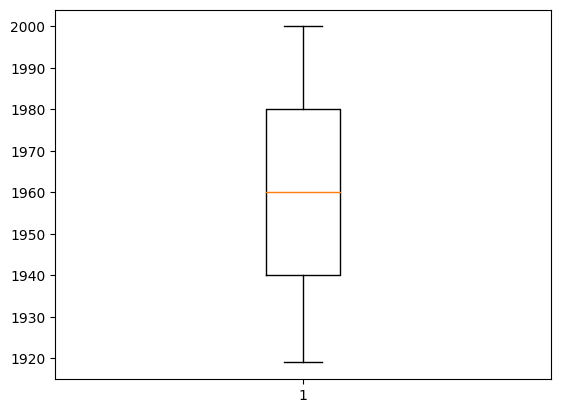

In [30]:
# 이상치는 확인되지 않습니다.
plt.boxplot(movies['release'].unique())

# **ratings(평점 정보)**

In [31]:
r_cols =  ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_file = 'https://raw.githubusercontent.com/yunong-E/cp2-Recommendation-System/main/1M_Dataset/ratings.dat'
ratings = pd.read_csv(ratings_file, sep='::', names=r_cols, encoding='ISO-8859-1')

ratings_num = ratings.shape[0]
unique_ratings_num = len(ratings.user_id.unique())

print('Number of Users:', ratings_num)
print('Number of Unique users:', unique_ratings_num)

Number of Users: 1000209
Number of Unique users: 6040


In [32]:
ratings.head(3)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [33]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [34]:
# 결측치 없습니다.
ratings.isna().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [35]:
# 중복값도 존재하지 않습니다.
ratings.duplicated().sum()

0

# **EDA**

In [37]:
print('유저의 수:', n_users)
print("평가된 영화의 갯수:",n_movies)
print('평가의 갯수:', ratings_num)
print('평점을 부여한 사람의 수(유저 수와 동일):', unique_ratings_num)

유저의 수: 6040
평가된 영화의 갯수: 3883
평가의 갯수: 1000209
평점을 부여한 사람의 수(유저 수와 동일): 6040


In [38]:
# 장르 중 첫번째로 언급된 (주요)장르를 main 장르로 선정하여 추출합니다.
# (추후 개봉된 영화들의 장르 추이를 파악하기 위함입니다.)
movies['main_genre'] = movies['genre'].apply(lambda x: x.split('|'))
chk_main_genre = []

for raw in range(len(movies['main_genre'])):
  chk_main_genre.append(movies.main_genre.get(raw)[0])

movies['main_genre'] = chk_main_genre

In [39]:
# README.txt를 참조하여 직업군 데이터프레임을 생성합니다. (대표 직업군 설정)
occ_id = [id for id in range(0, 21)]
occ_list = {'occupation': ["other", "educator", "artist","admin"
                          , "college_student", "customer_service"
                          , "health_care", "executive", "farmer"
                          , "homemaker", "K_12", "lawyer", "programmer"
                          , "retired", "sales", "scientist"
                          , "self_employed", "engineer", "craftsman"
                          , "unemployed", "writer"],
            'occupation_id': occ_id}

occupation = pd.DataFrame(occ_list, columns=['occupation_id', 'occupation']) 
occupation

,occupation_id,occupation
0,0,other
1,1,educator
2,2,artist
3,3,admin
4,4,college_student
5,5,customer_service
6,6,health_care
7,7,executive
8,8,farmer
9,9,homemaker


In [40]:
# merge를 진행합니다. 
# 유저의 직업군을 숫자가 아닌 오브젝트로 확인하기 위함입니다.
df1 = pd.merge(users, occupation, on='occupation_id')
df1

,user_id,sex,age,occupation_id,zip_code,occupation
0,1,F,1,10,48067,K_12
1,19,M,1,10,48073,K_12
2,51,F,1,10,10562,K_12
3,75,F,1,10,01748,K_12
4,86,F,1,10,54467,K_12
...,...,...,...,...,...,...
6035,5819,M,50,6,70808,health_care
6036,5866,F,25,6,06114,health_care
6037,5921,M,25,6,15146,health_care
6038,6026,M,35,6,11210,health_care


In [41]:
# merge를 진행합니다.
# '영화 이름(movie_title)'과 '평점(rating)'을 동시에 확인하기 위함이며, 이를 통해 '영화별 평균 평점'과 같은 통계치를 낼 수 있습니다.
df2 = pd.merge(ratings, movies, on='movie_id')
df2

,user_id,movie_id,rating,timestamp,movie_title,genre,release,main_genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama
...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),Documentary,1998,Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama,1998,Drama
1000206,5780,2845,1,958153068,White Boys (1999),Drama,1999,Drama
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western,1973,Comedy


In [63]:
# 동일한 사람이 동일한 영화를 중복으로 볼 수 있을까?
# 평점을 다르게 줄 가능성(취향의 변화)를 알아보기 위함.
chk_list = df2.groupby(['user_id', 'movie_id'])['movie_title'].count()
chk_list

user_id  movie_id
1        1           1
         48          1
         150         1
         260         1
         527         1
                    ..
6040     3683        1
         3703        1
         3735        1
         3751        1
         3819        1
Name: movie_title, Length: 1000209, dtype: int64

In [54]:
chk_value = chk_list[2] != 1
chk_value

movie_id
21      False
95      False
110     False
163     False
165     False
        ...  
3678    False
3699    False
3735    False
3809    False
3893    False
Name: movie_title, Length: 129, dtype: bool

In [62]:
# 위와 같은 경우는 없었다.
# 즉, 취향의 변화는 판단할 수 없으며,
# 다만 한 사람이 똑같은 영화를 두 번 보았다는 확률은 0에 수렴한다는 사실을 알 수 있다.
for row in chk_value:
  if row == True:
    print("중복있음")

In [64]:
# 성별에 따른 관람한 영화 장르 등을 확인하기 위해 모든 데이터프레임을 병합합니다. 
ratings_users = pd.merge(ratings, df1, on='user_id') # 평점+유저
ratings_users_movies = pd.merge(ratings_users, movies, on='movie_id') # (평점+유저)+영화정보

In [65]:
ratings_users_movies.head()

,user_id,movie_id,rating,timestamp,sex,age,occupation_id,zip_code,occupation,movie_title,genre,release,main_genre
0,1,1193,5,978300760,F,1,10,48067,K_12,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama
1,2,1193,5,978298413,M,56,16,70072,self_employed,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama
2,12,1193,4,978220179,M,25,12,32793,programmer,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama
3,15,1193,4,978199279,M,25,7,22903,executive,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama
4,17,1193,5,978158471,M,50,1,95350,educator,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama


In [192]:
# 상관관계를 알아보자. (메인장르, 혹은 장르묶음 엔코딩필요.)
chk_corr = ratings_users_movies.copy()
chk_corr.drop(columns=['user_id', 'movie_id', 'zip_code', 'occupation', 'movie_title'], inplace=True)
chk_corr

,rating,timestamp,sex,age,occupation_id,genre,release,main_genre
0,5,978300760,F,1,10,Drama,1975,Drama
1,5,978298413,M,56,16,Drama,1975,Drama
2,4,978220179,M,25,12,Drama,1975,Drama
3,4,978199279,M,25,7,Drama,1975,Drama
4,5,978158471,M,50,1,Drama,1975,Drama
...,...,...,...,...,...,...,...,...
1000204,5,958846401,M,18,17,Documentary,1998,Documentary
1000205,3,976029116,M,35,14,Drama,1998,Drama
1000206,1,958153068,M,18,17,Drama,1999,Drama
1000207,5,957756608,F,18,20,Comedy|Drama|Western,1973,Comedy


In [193]:
chk_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   rating         1000209 non-null  int64 
 1   timestamp      1000209 non-null  int64 
 2   sex            1000209 non-null  object
 3   age            1000209 non-null  int64 
 4   occupation_id  1000209 non-null  int64 
 5   genre          1000209 non-null  object
 6   release        1000209 non-null  int64 
 7   main_genre     1000209 non-null  object
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


In [194]:
hot_encoder = OneHotEncoder()
label_encoder = LabelEncoder()

label_encoder

LabelEncoder()

In [195]:
label_sex = chk_corr.sex
label_gerne = chk_corr['main_genre']

In [196]:
label_encoder.fit(label_sex)
label_encoded = label_encoder.transform(label_sex)
chk_corr.sex = label_encoded

label_encoder.fit(label_gerne)
label_encoded = label_encoder.transform(label_gerne)

chk_corr['main_genre'] = label_encoded
chk_corr.head()

,rating,timestamp,sex,age,occupation_id,genre,release,main_genre
0,5,978300760,0,1,10,Drama,1975,7
1,5,978298413,1,56,16,Drama,1975,7
2,4,978220179,1,25,12,Drama,1975,7
3,4,978199279,1,25,7,Drama,1975,7
4,5,978158471,1,50,1,Drama,1975,7


In [198]:
# 상관관계 확인
# rating과 관련이 있는 피쳐는 age - main_genre 정도로 확인이 된다.
# 이 마저 높은 수치는 아닌 것으로 확인이 된다.
chk_corr = chk_corr.corr()
chk_corr

,rating,timestamp,sex,age,occupation_id,release,main_genre
rating,1.000000,-0.026770,-0.019861,0.056869,0.006753,-0.156946,0.041356
timestamp,-0.026770,1.000000,-0.008895,-0.064562,0.015646,0.027148,0.026597
sex,-0.019861,-0.008895,1.000000,-0.003189,0.114974,-0.002831,-0.045308
age,0.056869,-0.064562,-0.003189,1.000000,0.078371,-0.165870,0.062423
occupation_id,0.006753,0.015646,0.114974,0.078371,1.000000,-0.010489,-0.009637
release,-0.156946,0.027148,-0.002831,-0.165870,-0.010489,1.000000,-0.129037
main_genre,0.041356,0.026597,-0.045308,0.062423,-0.009637,-0.129037,1.000000


In [66]:
ratings_users_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   user_id        1000209 non-null  int64 
 1   movie_id       1000209 non-null  int64 
 2   rating         1000209 non-null  int64 
 3   timestamp      1000209 non-null  int64 
 4   sex            1000209 non-null  object
 5   age            1000209 non-null  int64 
 6   occupation_id  1000209 non-null  int64 
 7   zip_code       1000209 non-null  object
 8   occupation     1000209 non-null  object
 9   movie_title    1000209 non-null  object
 10  genre          1000209 non-null  object
 11  release        1000209 non-null  int64 
 12  main_genre     1000209 non-null  object
dtypes: int64(7), object(6)
memory usage: 106.8+ MB


In [67]:
# 결측값이 없음을 확인했습니다.
ratings_users_movies.isna().sum()

user_id          0
movie_id         0
rating           0
timestamp        0
sex              0
age              0
occupation_id    0
zip_code         0
occupation       0
movie_title      0
genre            0
release          0
main_genre       0
dtype: int64

In [68]:
# 중복값이 없음을 확인했습니다.
ratings_users_movies.duplicated().sum()

0

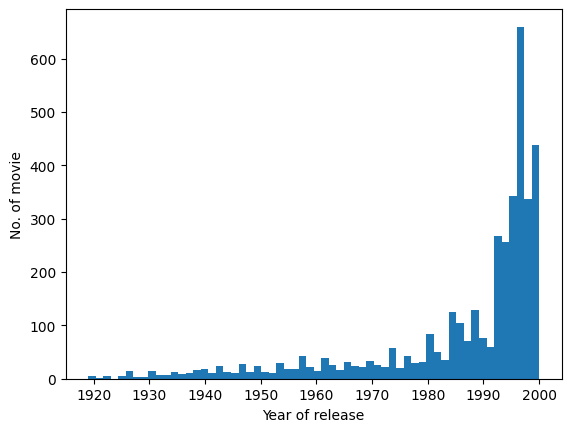

In [69]:
# 제일 먼저 영화 개봉의 흐름을 알아봅시다.
# 개봉년도를 10년 단위로 구분지어 한 눈에 알기 쉽게 시각화를 진행하도록 합니다.
# 세부 년도별 그래프를 작성시, 아래와 같이 한 눈에 파악하기 어렵기 때문입니다.
plt.hist(movies['release'], bins=60)
plt.xlabel('Year of release')
plt.ylabel('No. of movie')
plt.show()

In [70]:
# 10년 단위로 나누기.
release_decade = []
    
for row in movies['release']:
  if row <= 1919:
    release_decade.append('1910')
  elif row <= 1929:
    release_decade.append('1920')
  elif row <= 1939:
    release_decade.append('1930')
  elif row <= 1949:
    release_decade.append('1940')
  elif row <= 1959:
    release_decade.append('1950')
  elif row <= 1969:
    release_decade.append('1960')
  elif row <= 1979:
    release_decade.append('1970')
  elif row <= 1989:
    release_decade.append('1980')
  elif row <= 1999:
    release_decade.append('1990')
  else:
    release_decade.append('2000')

movies['release_decade'] = release_decade
movies['release_decade'] = movies['release_decade'].astype(int)

In [71]:
# 10년 단위(decade)로 개봉한 영화의 갯수들을 카운트 합니다.
release_cnt = movies.groupby('release_decade')['release'].count()
release_cnt

release_decade
1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: release, dtype: int64

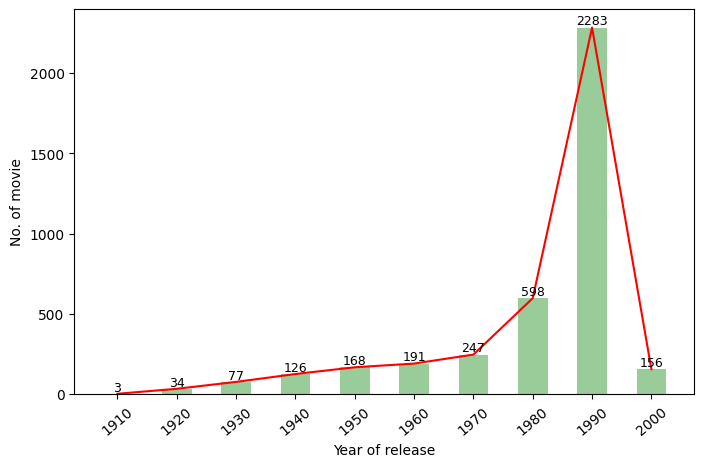

In [72]:
# 년도별 개봉한 영화의 갯수 입니다.
# 1990년도에 개봉한 영화가 가장 많았음을 알 수 있습니다.
# 2000년도 이후에는 급격한 감소량을 보입니다. 
# 이는 2000년도 이후에 영화 개봉률이 하락했기 때문이 아니라, 2003년 2월까지의 데이터를 사용했기 때문에 이런 추이를 보이는 것입니다.
# MovieLens 1M Dataset에 대한 설명 : https://grouplens.org/datasets/movielens/ [Released 2/2003.]
plt.figure(figsize=(8, 5))
bar1 = plt.bar(release_cnt.index, release_cnt.values, width=5, color='green', alpha=0.4)
plt.xlabel('Year of release')
plt.ylabel('No. of movie')
plt.plot(release_cnt.index, release_cnt.values, color='red')
plt.xticks(release_cnt.index, rotation=40)

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%1d' % height, ha='center', va='bottom', size = 9)

plt.show()

In [73]:
# 영화별 평균 평점을 확인해봅시다.
ratings_rank = pd.DataFrame(df2.groupby('movie_title').mean()['rating'])
ratings_rank_sort = ratings_rank.value_counts(ascending=False)
ratings_rank

,rating
movie_title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
...,...
"Zed & Two Noughts, A (1985)",3.413793
Zero Effect (1998),3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000


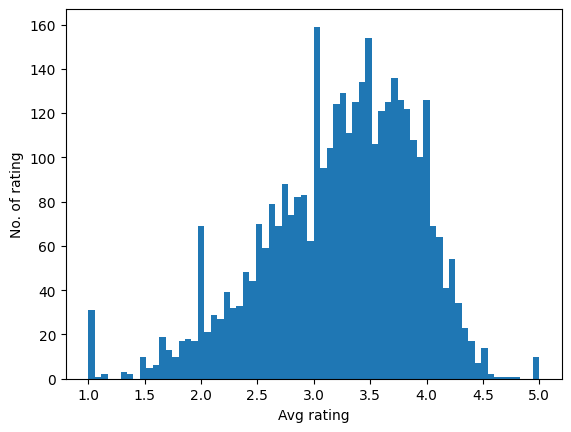

In [74]:
# 영화별 평균 평점(ratings)의 분포도
# 100k 데이터의 분포도와 비교했을 때, 보다 뚜렷한 정규분포의 형태를 띄고 있음을 확인할 수 있습니다.
plt.hist(ratings_rank['rating'], bins=70)
plt.xlabel('Avg rating')
plt.ylabel('No. of rating')
plt.show()

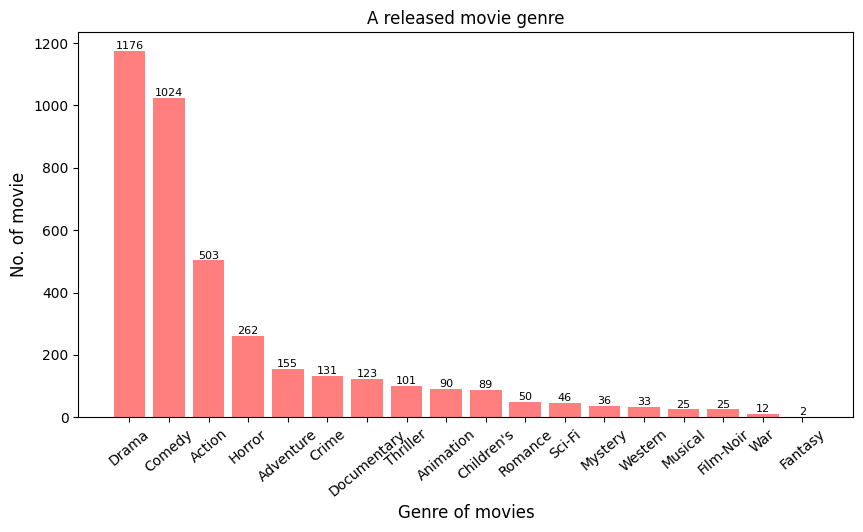

In [75]:
# 개봉한 영화들의 장르는 어떻게 될까요? 알아봅시다.
# 영화의 장르별 합을 구한뒤 내림차순으로 정렬합니다.
# Drama - Comedy - Action 순으로 '개봉'된 영화들의 장르들이 압도적으로 많음을 파악할 수 있었습니다.
genre_sum = movies.groupby('main_genre')['genre'].count()
genre_sum_sort = genre_sum.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.title('A released movie genre')
bar = plt.bar(genre_sum_sort.index, genre_sum_sort.values, color='red', alpha=0.5)
plt.xticks(rotation=40)
# plt.grid(True)
plt.xlabel('Genre of movies', fontsize=12)
plt.ylabel('No. of movie', fontsize=12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%1d' % height, ha='center', va='bottom', size = 8)

plt.show()

In [76]:
# 그렇다면 '개봉된 영화의 장르'와 '흥행한 영화의 장르'가 같을까요? 
# 이번에는 흥행한 영화를 살펴봅시다.
# 영화 장르별로 평가의 갯수를 그룹짓습니다.
movies_rank = ratings_users_movies.groupby('main_genre')['rating'].count()
movies_rank_sort = movies_rank.sort_values(ascending=False)

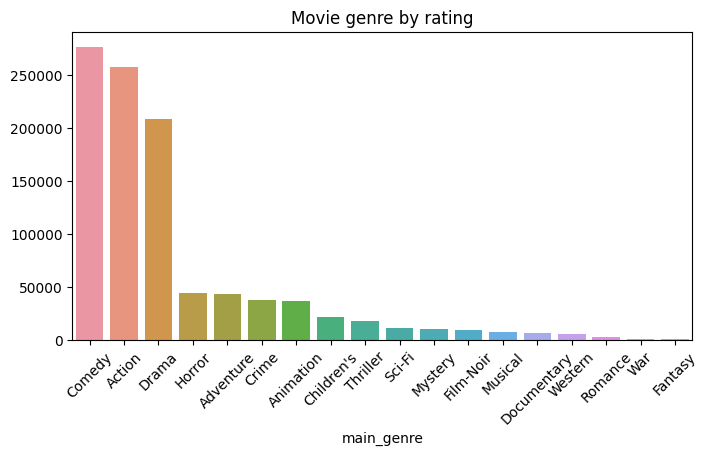

In [77]:
# 흥행한 영화의 장르 입니다. (내림차순)
plt.figure(figsize=(8,4))
plt.title('Movie genre by rating')
sns.barplot(x=movies_rank_sort.index, y=movies_rank_sort.values)
plt.xticks(rotation=45);

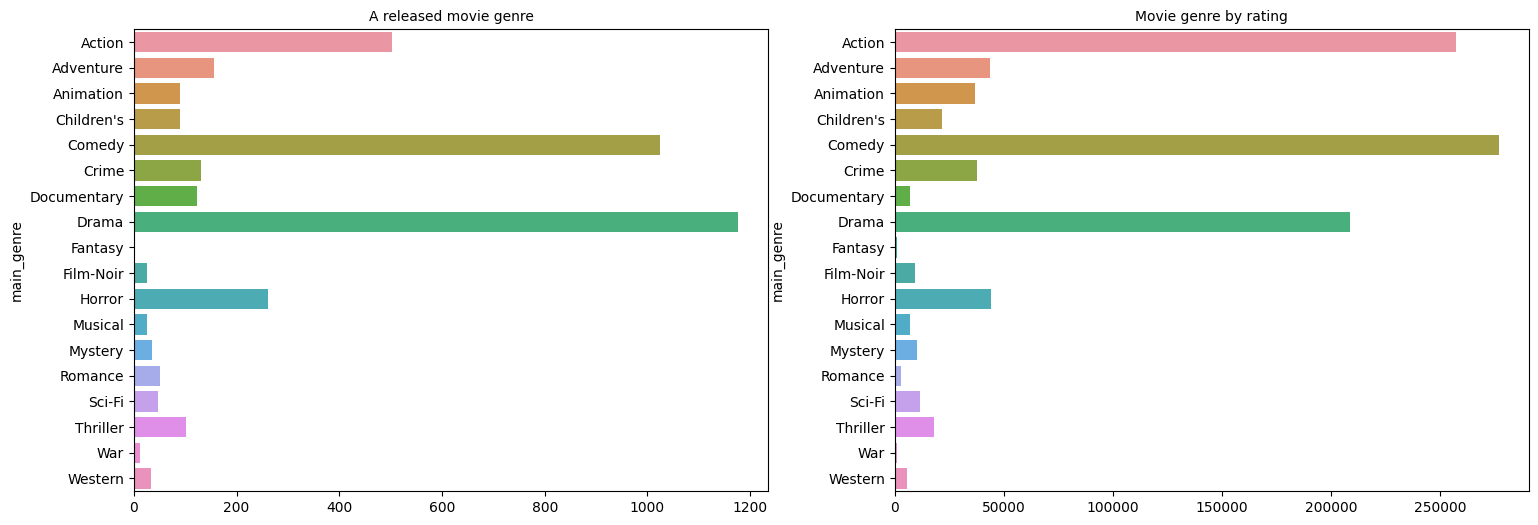

In [78]:
# 위의 둘을 보기 쉽게 비교해봅니다. 
# 이 둘은 단위가 서로 다릅니다. 영화의 갯수(중복없음) vs 평가의 갯수(중복있음)이기 때문입니다. 따라서, 비율을 봐주시면 됩니다.
# 개봉한 영화의 장르(좌), 평가갯수에 따른 영화의 장르(우) 가 서로 다름을 알 수 있었습니다.
# 아무리 공급이 많은 장르라고 한들, 정작 평가에 있어서 중요한 것은 고객들의 수요(취향)라는 것을 알 수 있습니다.
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
sns.barplot(x=genre_sum.values, y=genre_sum.index)
plt.title('A released movie genre', fontsize=10)

plt.subplot(1,2,2)
sns.barplot(x=movies_rank.values, y=movies_rank.index)
plt.title('Movie genre by rating', fontsize=10)
plt.show()

In [79]:
# 참고로 Long tail 속성도 확인해보고 갑니다.
movies_count = pd.DataFrame(ratings_users_movies.groupby('movie_title').size(), columns=['count'])
movies_count_sort = movies_count.value_counts(ascending=False)
movies_count.head()

,count
movie_title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199


Text(0, 0.5, 'number of ratings')

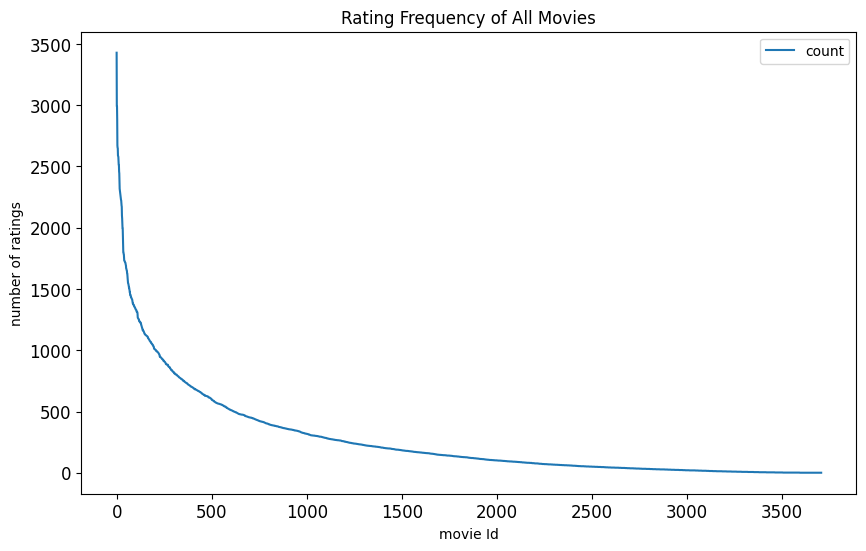

In [80]:
# 모든 영화의 평가 갯수(빈도)를 나타낸 그래프 입니다.
# 100K 데이터셋 보다는 뚜렷한 Long tail의 속성을 보이고 있습니다.
# 평가의 갯수가 낮은 영화들을 통해 매출을 상승시킬 수 있는 가능성이 있습니다.
# 추천 시스템의 역할이 더욱 중요(필요)해짐을 알 수 있습니다.
ax = movies_count \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(10, 6),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

**롱테일 속성이란?**

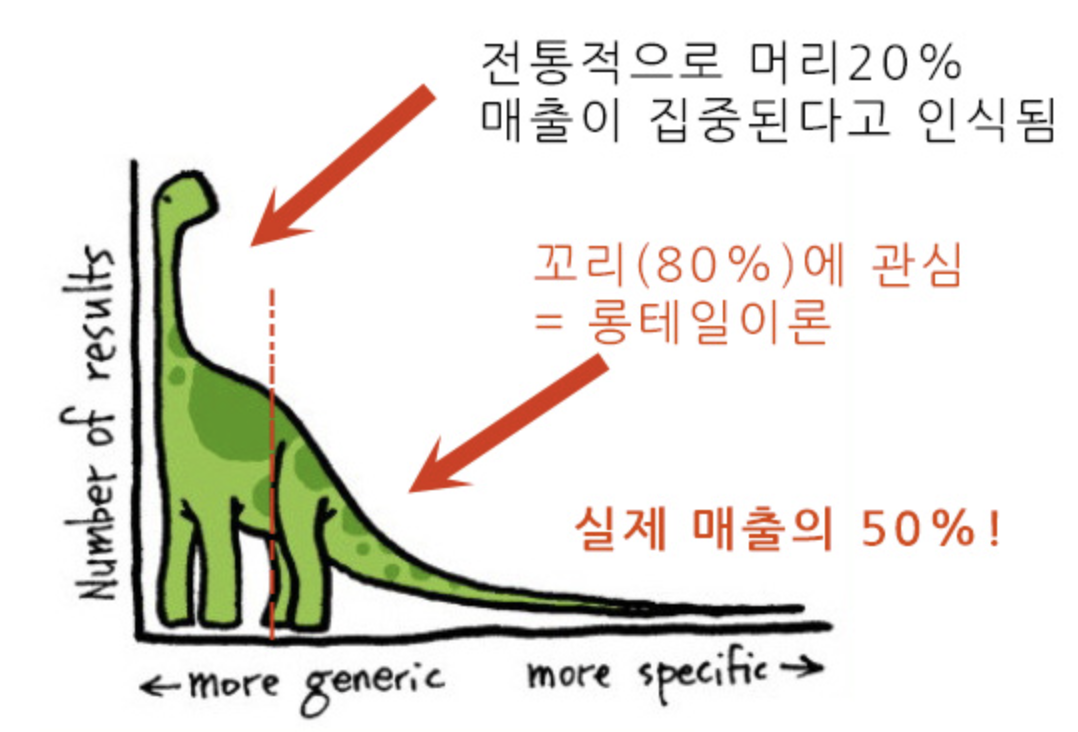

In [81]:
# 평가가 많은 영화 vs 평점이 높은 영화
movies_count.columns

Index(['count'], dtype='object')

In [82]:
ratings_rank_sort

rating  
3.000000    90
2.000000    60
4.000000    60
3.500000    40
1.000000    31
            ..
3.134815     1
3.135272     1
3.135294     1
3.135338     1
3.380000     1
Length: 2763, dtype: int64

In [199]:
# (평가의 갯수와 상관없이) 평점이 높은 영화들
top_rating = ratings_users_movies.groupby(['movie_id','movie_title']).mean()['rating'].sort_values(ascending=False)[:20]
top_rating

movie_id  movie_title                                                        
989       Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
3881      Bittersweet Motel (2000)                                               5.000000
1830      Follow the Bitch (1998)                                                5.000000
3382      Song of Freedom (1936)                                                 5.000000
787       Gate of Heavenly Peace, The (1995)                                     5.000000
3280      Baby, The (1973)                                                       5.000000
3607      One Little Indian (1973)                                               5.000000
3233      Smashing Time (1967)                                                   5.000000
3172      Ulysses (Ulisse) (1954)                                                5.000000
3656      Lured (1947)                                                           5.000000
3245      I Am Cuba (S

In [211]:
top_rating.iloc[:1:2]

movie_id  movie_title                              
989       Schlafes Bruder (Brother of Sleep) (1995)    5.0
Name: rating, dtype: float64

In [215]:
top_rating.iloc[:3:1]

movie_id  movie_title                              
989       Schlafes Bruder (Brother of Sleep) (1995)    5.0
3881      Bittersweet Motel (2000)                     5.0
1830      Follow the Bitch (1998)                      5.0
Name: rating, dtype: float64

In [221]:
top_rating.iloc[:3:]

movie_id  movie_title                              
989       Schlafes Bruder (Brother of Sleep) (1995)    5.0
3881      Bittersweet Motel (2000)                     5.0
1830      Follow the Bitch (1998)                      5.0
Name: rating, dtype: float64

In [84]:
# 평가의 갯수가 많은 영화들
ratings_users_movies.groupby(['movie_id','movie_title']).count()['rating'].sort_values(ascending=False)[:20]

movie_id  movie_title                                          
2858      American Beauty (1999)                                   3428
260       Star Wars: Episode IV - A New Hope (1977)                2991
1196      Star Wars: Episode V - The Empire Strikes Back (1980)    2990
1210      Star Wars: Episode VI - Return of the Jedi (1983)        2883
480       Jurassic Park (1993)                                     2672
2028      Saving Private Ryan (1998)                               2653
589       Terminator 2: Judgment Day (1991)                        2649
2571      Matrix, The (1999)                                       2590
1270      Back to the Future (1985)                                2583
593       Silence of the Lambs, The (1991)                         2578
1580      Men in Black (1997)                                      2538
1198      Raiders of the Lost Ark (1981)                           2514
608       Fargo (1996)                                             2513


In [85]:
# 영화 이름 + 평가 갯수 높은 영화들의 + 평점 을 보고 싶습니다.
ratings_users_movies.groupby(['movie_title']).mean()['rating']

movie_title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [87]:
# 연령별 인기 장르가 있을까요?
# 먼저 연령대별 비율을 확인해봅니다.

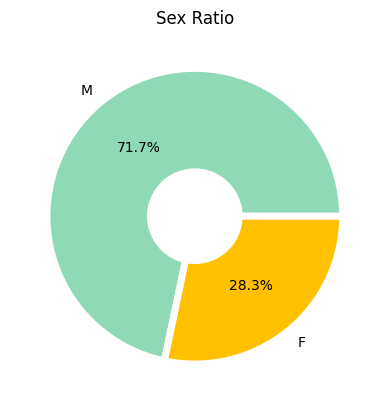

In [88]:
# 성별에 따른 인기 장르가 있을까요?
# 성비를 확인해봅니다.
sex_ratio = users.sex.value_counts(normalize=True)

colors = ['#8fd9b6', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.title('Sex Ratio')
plt.pie(sex_ratio, labels=sex_ratio.index, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

In [89]:
# 중복을 제외한 영화들의 장르를 확인해봅니다.
ratings_users_movies['main_genre'].unique()

array(['Drama', 'Animation', 'Musical', 'Action', 'Comedy', 'Adventure',
       'Romance', "Children's", 'Thriller', 'Crime', 'Western',
       'Documentary', 'Mystery', 'Horror', 'Sci-Fi', 'Film-Noir', 'War',
       'Fantasy'], dtype=object)

In [90]:
generes = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy',
           'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
           'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [91]:
# 영화 장르별, 성별별로 그룹을 짓습니다.
temp = ratings_users_movies.groupby(['main_genre', 'sex'])['sex'].count()
# temp.sum() # 1000209
temp

main_genre   sex
Action       F       45650
             M      211807
Adventure    F       10322
             M       33308
Animation    F       10918
             M       26018
Children's   F        6650
             M       14841
Comedy       F       76899
             M      200024
Crime        F        8413
             M       29436
Documentary  F        1702
             M        5115
Drama        F       61441
             M      147186
Fantasy      F         127
             M         663
Film-Noir    F        2068
             M        7275
Horror       F        8608
             M       35562
Musical      F        2844
             M        4268
Mystery      F        2621
             M        7616
Romance      F        1189
             M        1643
Sci-Fi       F        1890
             M        9574
Thriller     F        4312
             M       13539
War          F         101
             M         890
Western      F         685
             M        5004
Name: sex, 

In [92]:
# 각 성별에 따른 리뷰의 갯수를 나눕니다.
M_genre = []
F_genre =[]

for i in range(len(temp)):
  if i % 2 == 1:
    M_genre.append(temp[i])
    # print(temp[i])
  else:
    F_genre.append(temp[i])

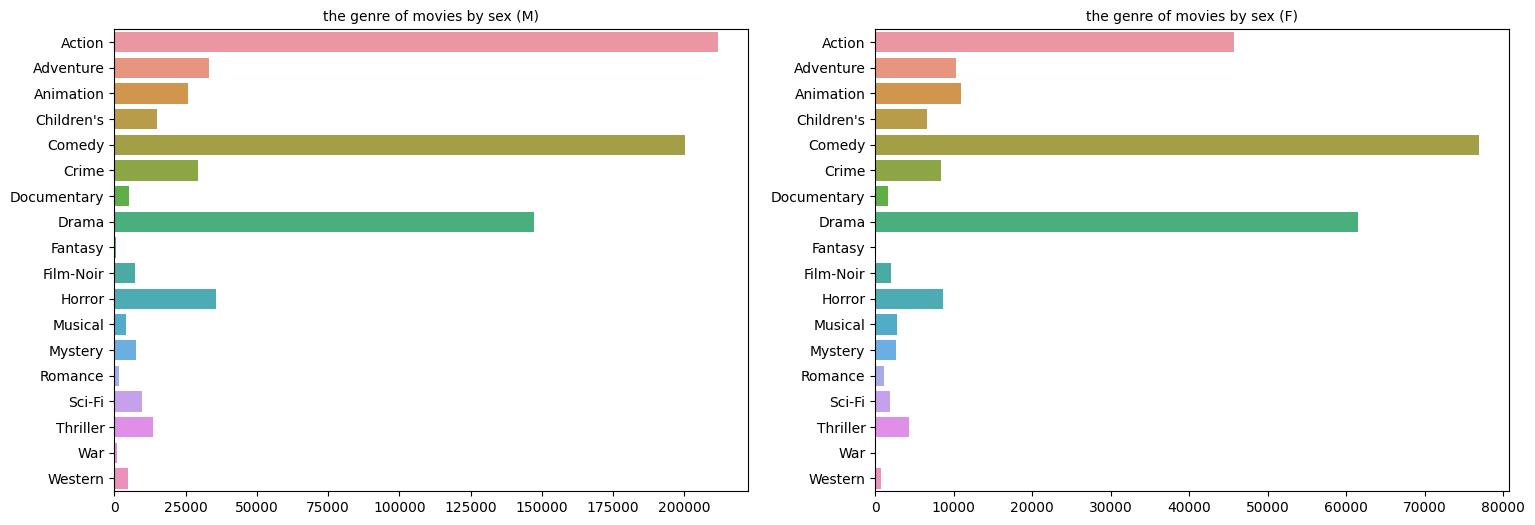

In [93]:
# 남성과 여성의 성비 차이로 단위 수가 다름을 알 수 있습니다.
# 남성의 경우 Action-Comedy-Drama 순으로 영화 관람을 한 반면,
# 여성의 경우 Comedy-Drama-Action 순으로 영화를 관람했음을 알 수 있습니다.
# 성별에 따라 관람한 영화의 장르가 다름을 확인할 수 있었습니다.
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
sns.barplot(x=M_genre, y=generes)
plt.title('the genre of movies by sex (M)', fontsize=10)

plt.subplot(1,2,2)
sns.barplot(x=F_genre, y=generes)
plt.title('the genre of movies by sex (F)', fontsize=10)
plt.show()

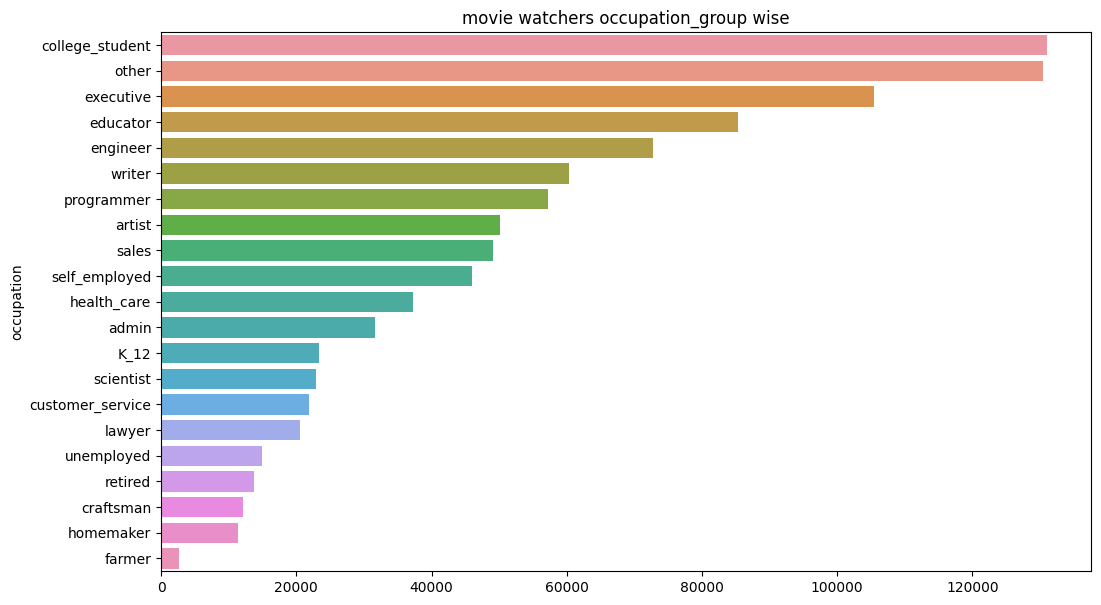

In [94]:
# 각 직업군 별 인기(선호) 장르가 있을까요?
# 먼저 직업군의 종류와 그의 수(비율)를 확인해봅시다.
plt.figure(figsize=(12,7))
movie_watcher_occupants = ratings_users_movies.groupby('occupation').size().sort_values(ascending=False)
sns.barplot(x=movie_watcher_occupants.values, y=movie_watcher_occupants.index)
plt.title('movie watchers occupation_group wise')
plt.xticks();

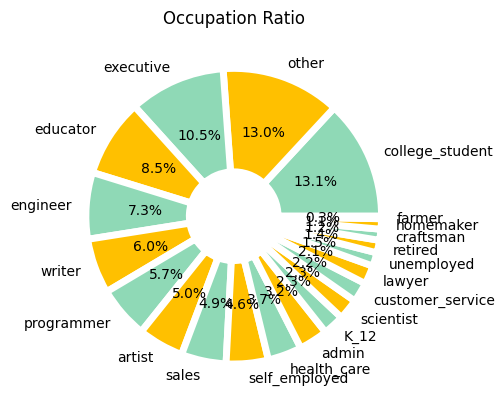

In [95]:
occupation_ratio = ratings_users_movies.occupation.value_counts(normalize=True)

colors = ['#8fd9b6', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.title('Occupation Ratio')
plt.pie(occupation_ratio, labels=occupation_ratio.index, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

In [128]:
# 영화 장르별, 직업군별로 그룹을 짓습니다.
temp2 = ratings_users_movies.groupby(['occupation', 'main_genre'])['occupation'].count()
# temp2.sum() # 1000209
df_temp2 = pd.DataFrame(temp2)
temp2

occupation  main_genre
K_12        Action        6067
            Adventure     1314
            Animation     1898
            Children's    1198
            Comedy        6563
                          ... 
writer      Romance        204
            Sci-Fi         736
            Thriller      1028
            War             67
            Western        340
Name: occupation, Length: 378, dtype: int64

In [129]:
df_temp2

occupation
occupation main_genre            
K_12       Action            6067
           Adventure         1314
           Animation         1898
           Children's        1198
           Comedy            6563
...                           ...
writer     Romance            204
           Sci-Fi             736
           Thriller          1028
           War                 67
           Western            340

[378 rows x 1 columns]

In [97]:
# other 직업군을 제외한, 가장 많은 비율을 차지하는 top5 직업군에 대해서 선호하는 장르를 확인해보겠습니다. 
# README.txt에 의하면 other은 불명확한 직업군이며, 이는 EDA진행시 해석에 영향을 미칠 수 있기 때문입니다. ("other" or not specified)
top5_occupation = movie_watcher_occupants[:6]
top5_occupation.drop('other', inplace=True)
top5_occupation

occupation
college_student    131032
executive          105425
educator            85351
engineer            72816
writer              60397
dtype: int64

In [130]:
temp2[:2]

occupation  main_genre
K_12        Action        6067
            Adventure     1314
Name: occupation, dtype: int64

In [121]:
temp2[1:2]

,,occupation
occupation,main_genre,
K_12,Adventure,1314


In [138]:
temp2[:3].values

array([6067, 1314, 1898])

In [132]:
temp2[:3].index

MultiIndex([('K_12',    'Action'),
            ('K_12', 'Adventure'),
            ('K_12', 'Animation')],
           names=['occupation', 'main_genre'])

In [ ]:
plt.plot(temp2[:3].index, temp2[:3].values)

In [99]:
# top5 장르와 top5 직업군을 동시에 볼 수 있는 시각화자료.
student= []
executive = []
educator = []
engineer = []
writer = []


In [ ]:
sns.barplot(x=temp2, y=temp2)
plt.title('the genre of movies by sex (F)', fontsize=10)
plt.show()

In [ ]:
ratings_users_movies.occupation.unique()